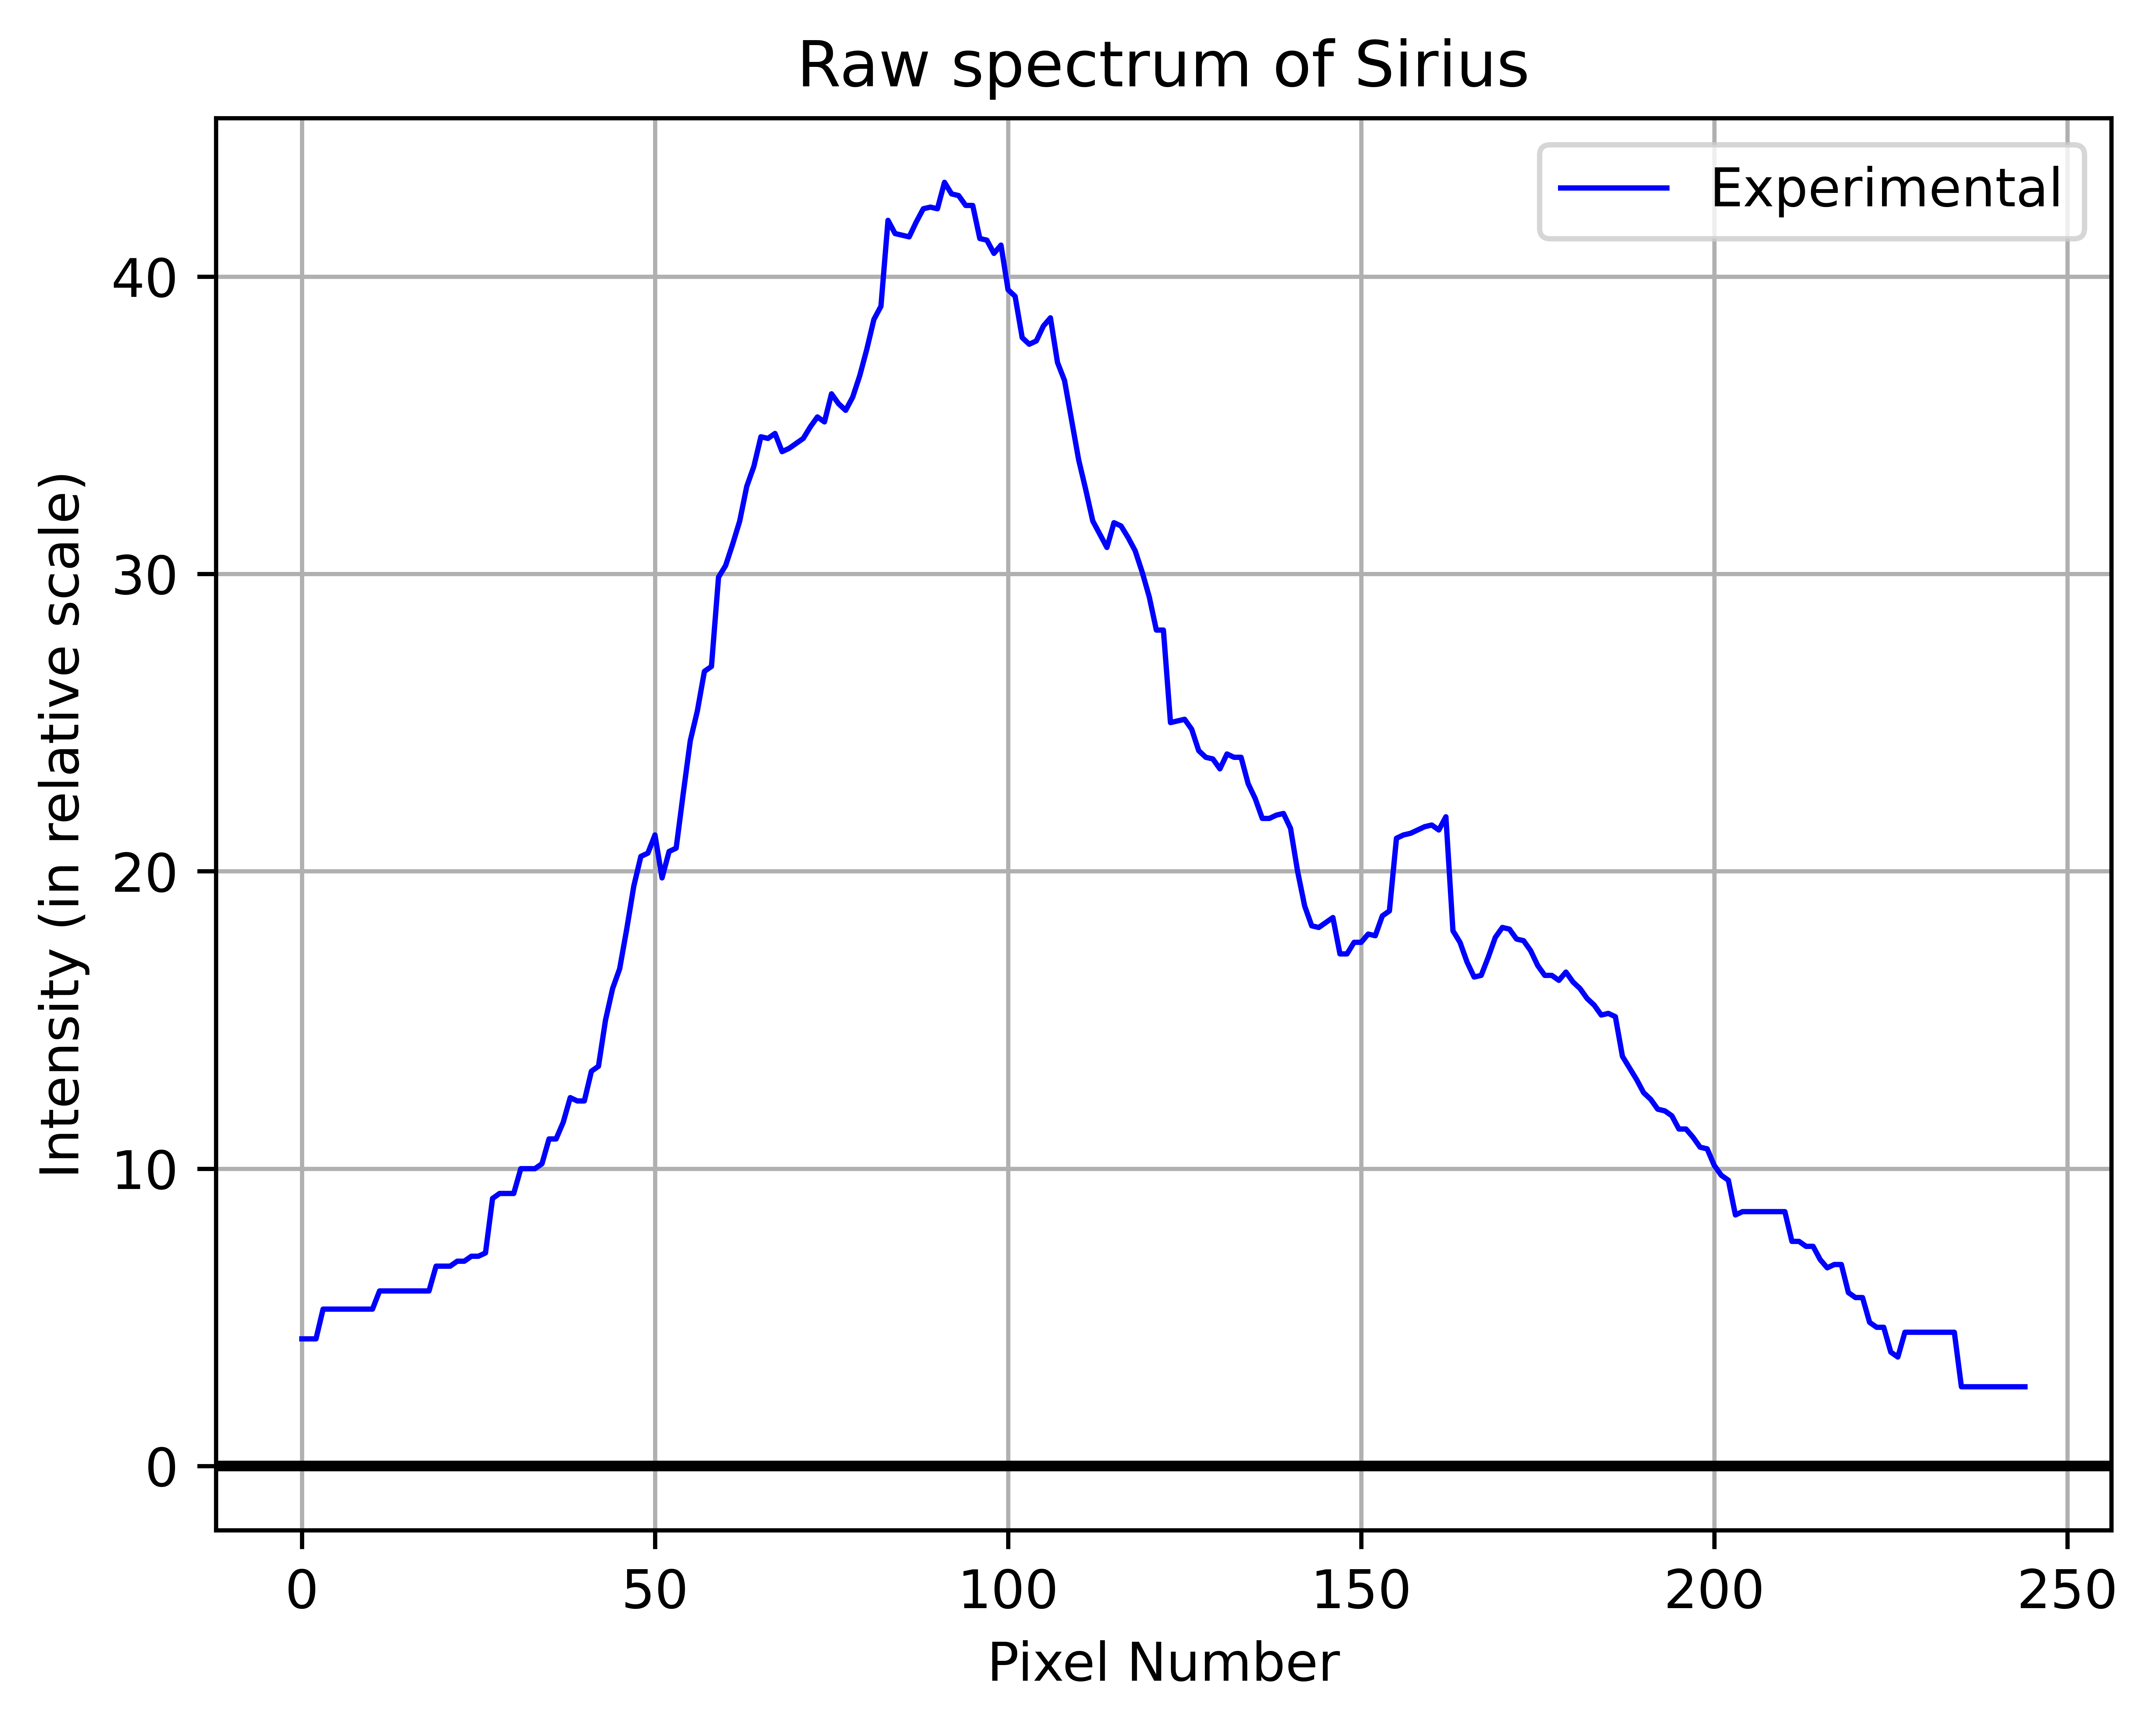

In [1]:
import numpy as np
import matplotlib.pyplot as plt

num = []                                                      ##Number array
iny = []                                                      ##Intensity values

with open("SiriusRawSpectraData.csv", 'r') as f:
    line = f.readline()
    for line in f:
        elements = line.strip().split(",")
        num.append(int(elements[0]))
        iny.append(float(elements[1]))

plt.figure(dpi = 1000)
plt.plot(num, iny, color = 'blue', ls = '-', lw = 1, label = 'Experimental')
plt.axhline(0, ls ='-', lw = 2, color = 'k')
plt.title("Raw spectrum of Sirius")
plt.xlabel("Pixel Number")
plt.ylabel('Intensity (in relative scale)')
plt.legend()
plt.grid()
plt.show()

### Finding two descent wavelength for caliberation

In [2]:
print(iny[51])                              ##Comparing with original spectra, this is H_gamma = 434 nm
print(iny[152])                             ##Comparing with original spectra, this is H_alpha = 656 nm

19.7778
17.8333


### Caliberation

In [3]:
res = (656 - 434)/(152 - 51)                 ##Resolution
print(f"The resolution of the spectrometer is: {res:0.3f} nm")

wavelen = [0 for i in num]                   ##Store wavelength data
for i in num:
    wavelen[i] = num[i]*res + 322

The resolution of the spectrometer is: 2.198 nm


/tmp/ipykernel_6292/145698479.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 4)


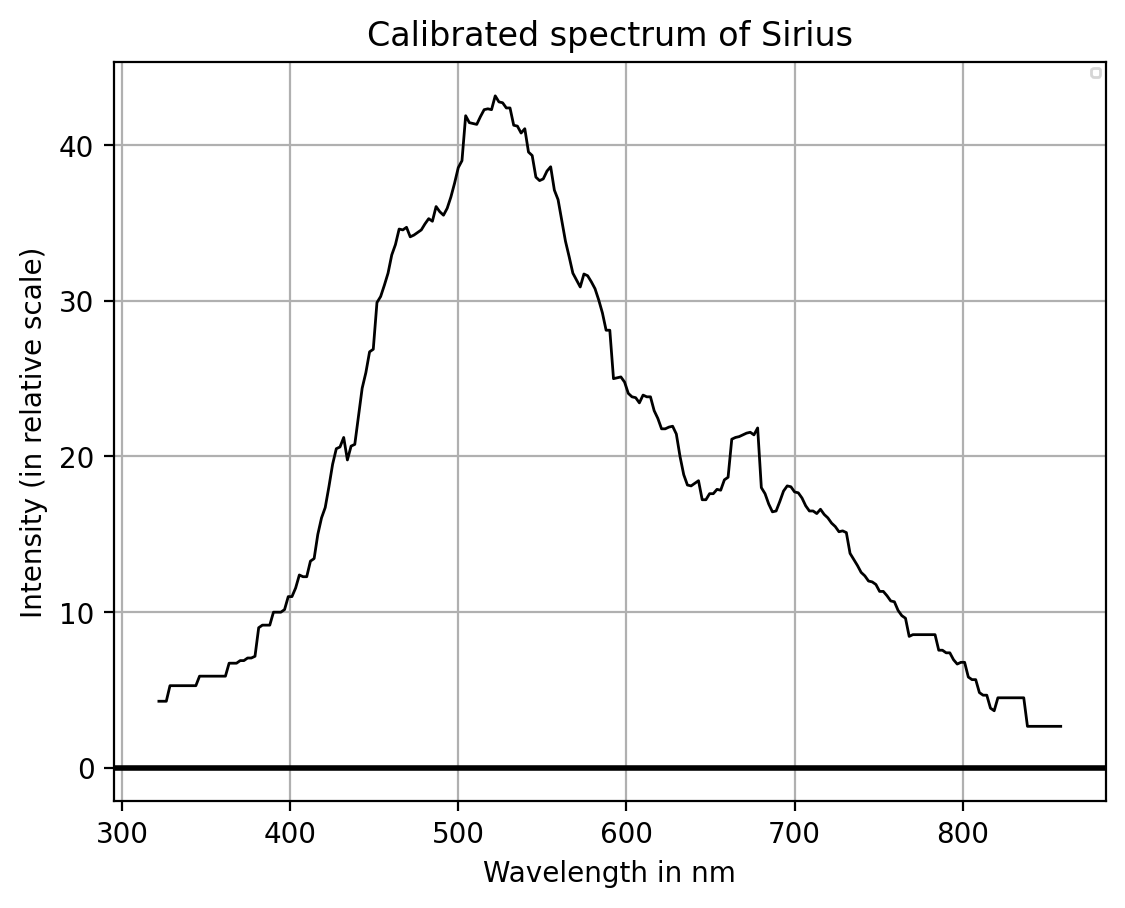

In [4]:
plt.figure(dpi = 200)
plt.plot(wavelen, iny, color = 'black', ls = '-', lw = 1)
plt.axhline(0, ls ='-', lw = 2, color = 'k')
plt.title("Calibrated spectrum of Sirius")
plt.xlabel("Wavelength in nm")
plt.ylabel('Intensity (in relative scale)')
plt.legend(fontsize = 4)
plt.grid()
plt.show()

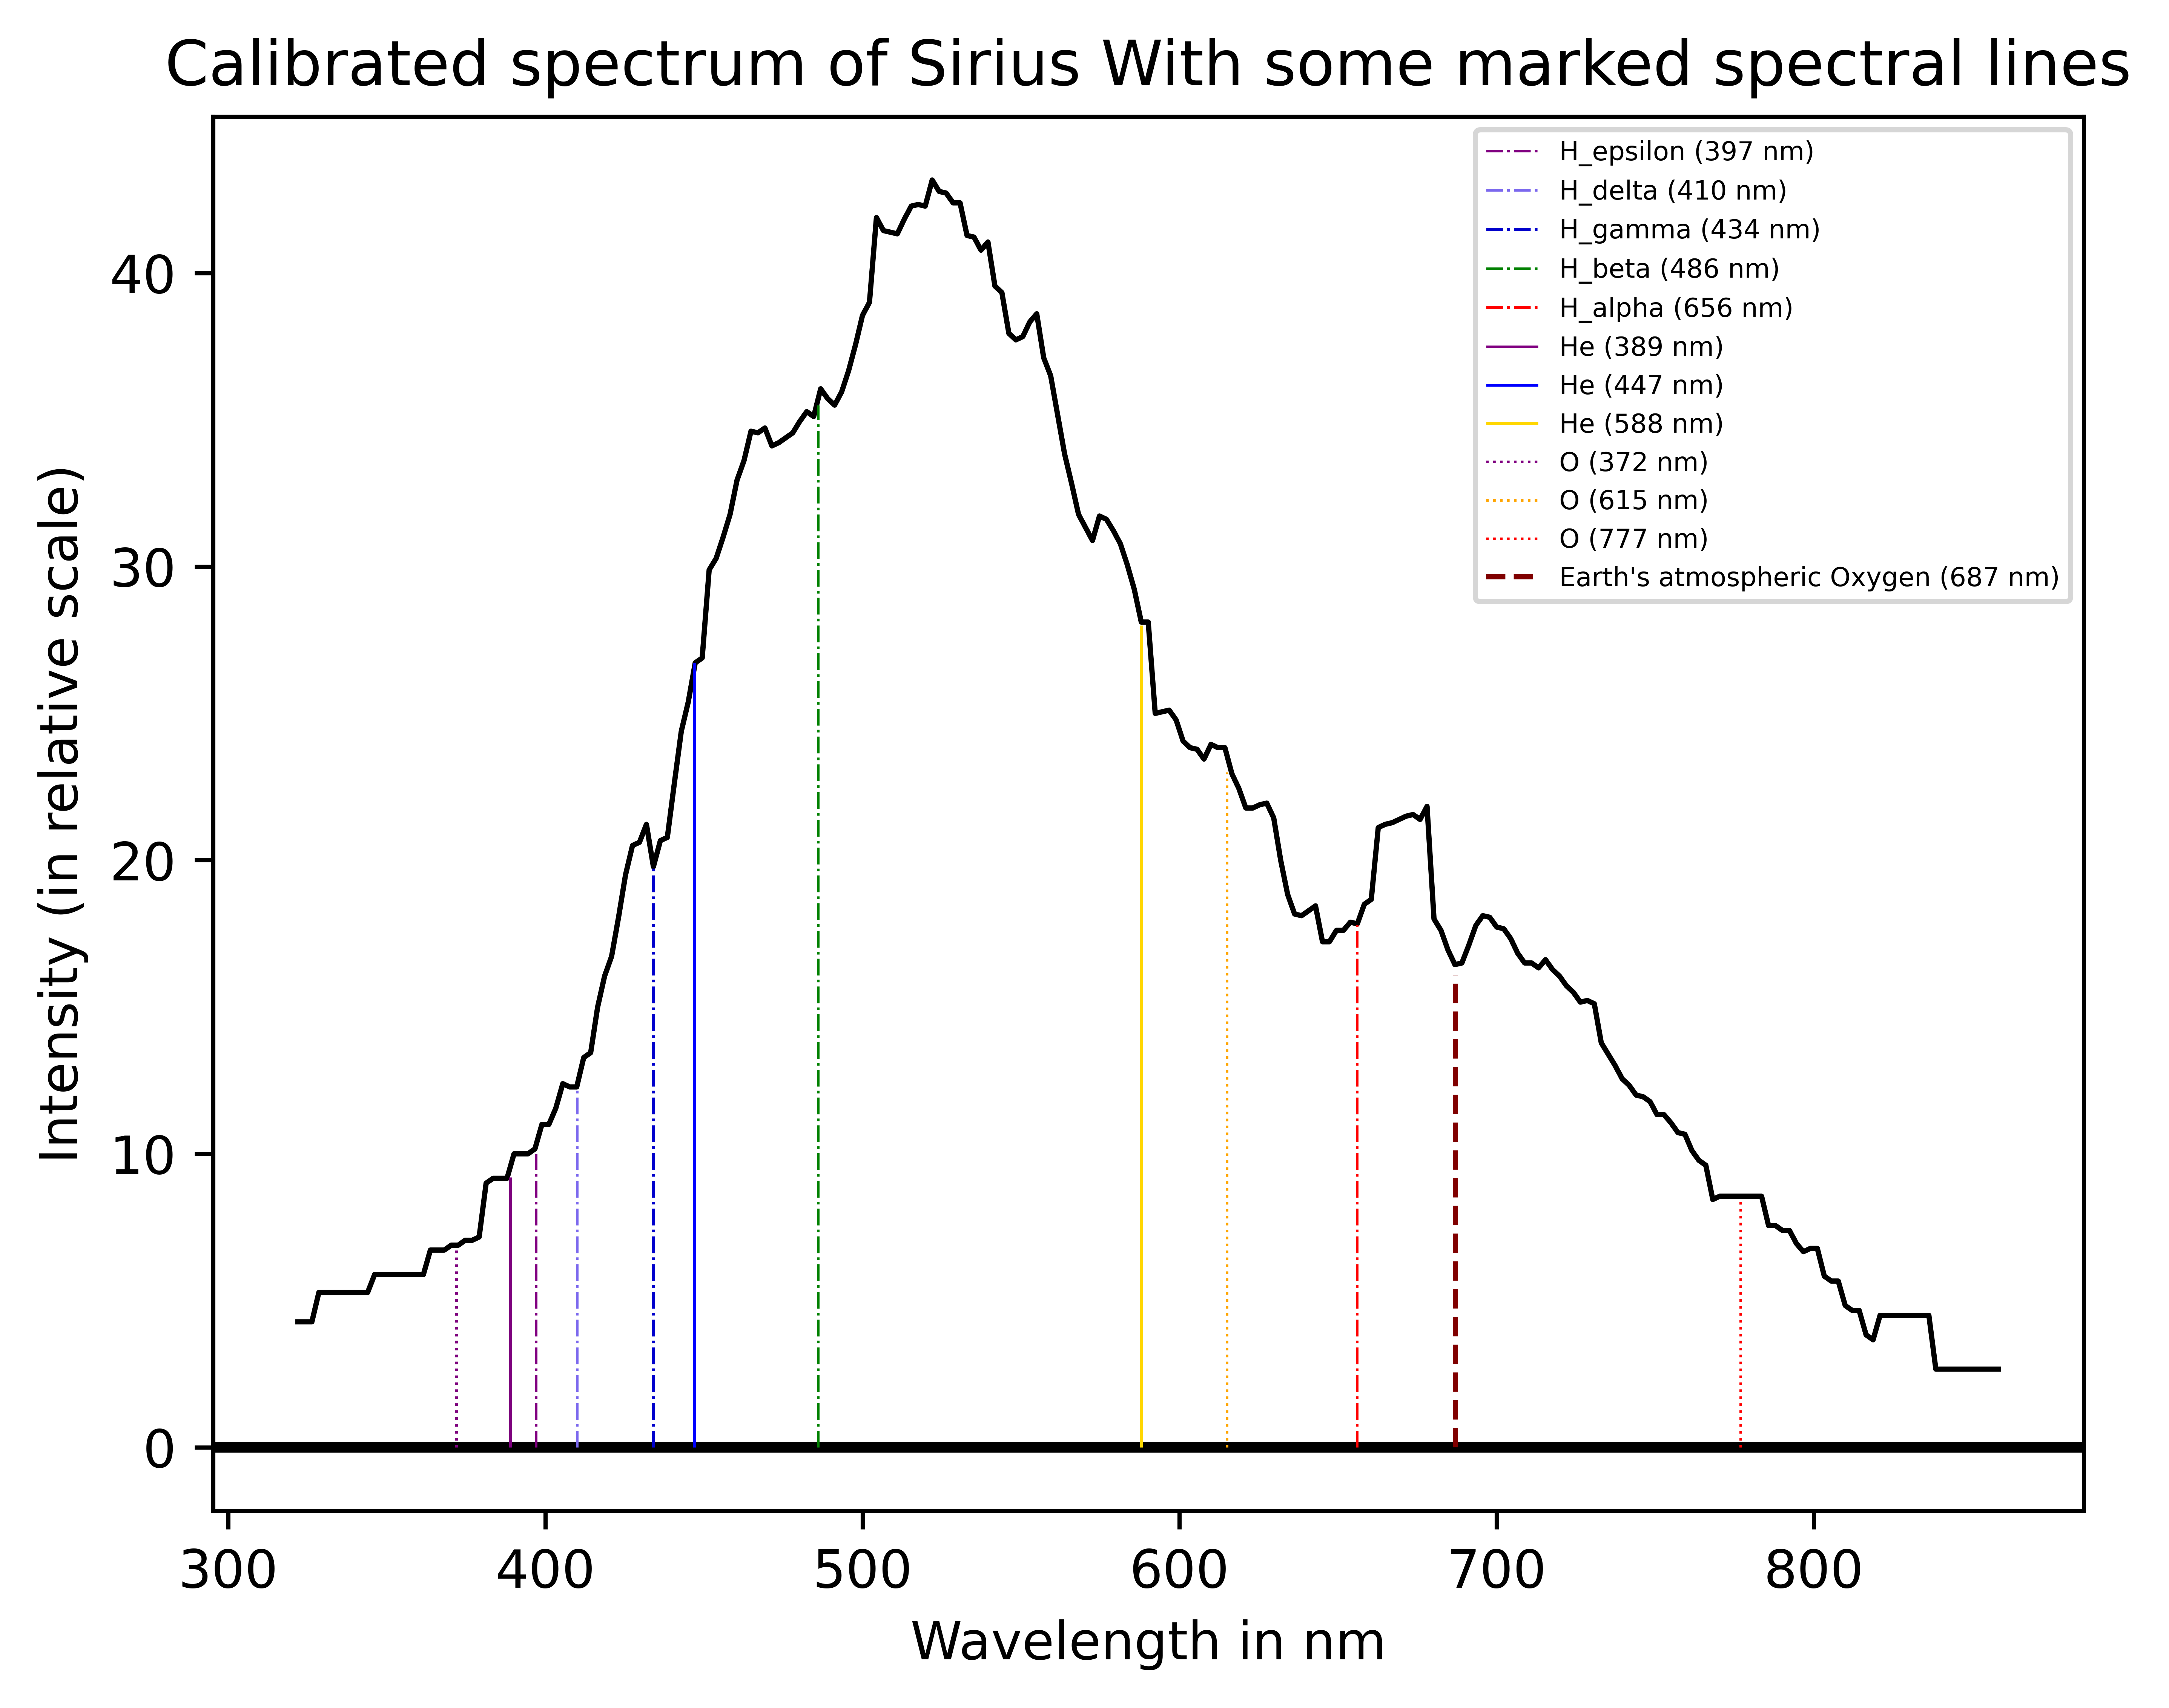

In [5]:
plt.figure(dpi = 1000)
plt.plot(wavelen, iny, color = 'black', ls = '-', lw = 1)
plt.axhline(0, ls ='-', lw = 2, color = 'k')

##Hydrogen
plt.vlines(397, 0, 10.0000, ls = "-.", color = "purple", lw = 0.5, label = "H_epsilon (397 nm)")
plt.vlines(410, 0, 12.2778, ls = "-.", color = "mediumslateblue", lw = 0.5, label = "H_delta (410 nm)")
plt.vlines(434, 0, 19.7778, ls = "-.", color = "mediumblue", lw = 0.5, label = "H_gamma (434 nm)")
plt.vlines(486, 0, 35.5000, ls = "-.", color = "green", lw = 0.5, label = "H_beta (486 nm)")
plt.vlines(656, 0, 17.8, ls = "-.", color = "red", lw = 0.5,  label = "H_alpha (656 nm)")

##Helium
plt.vlines(389, 0, 9.2, ls = "-", color = "purple", lw = 0.5, label = "He (389 nm)")
plt.vlines(447, 0, 26.7222, ls = "-", color = "blue", lw = 0.5, label = "He (447 nm)")
plt.vlines(588, 0, 28, ls = "-", color = "gold", lw = 0.5, label = "He (588 nm)")

##Oxygen
plt.vlines(372, 0, 6.7222, ls = ":", color = "purple", lw = 0.5, label = "O (372 nm)")
plt.vlines(615, 0, 23, ls = ":", color = "orange", lw = 0.5, label = "O (615 nm)")
plt.vlines(777, 0, 8.5000, ls = ":", color = "red", lw = 0.5, label = "O (777 nm)")

##Atmospheric Oxygen
plt.vlines(687, 0, 16.1, ls = "--", color = "maroon", lw = 1, label = "Earth's atmospheric Oxygen (687 nm)")

plt.title("Calibrated spectrum of Sirius With some marked spectral lines")
plt.xlabel("Wavelength in nm")
plt.ylabel('Intensity (in relative scale)')
plt.legend(fontsize = 5)
plt.show()